# Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

%matplotlib inline

# Load data
We use <a href="https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction">Heart Failure Prediction Dataset</a> from Kaggle
## Attribute Information
* **Age**: age of the patient [years]
* **Sex**: sex of the patient [M: Male, F: Female]
* **ChestPainType**: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
* **RestingBP**: resting blood pressure [mm Hg]
* **Cholesterol**: serum cholesterol [mm/dl]
* **FastingBS**: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
* **RestingECG**: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
* **MaxHR**: maximum heart rate achieved [Numeric value between 60 and 202]
* **ExerciseAngina**: exercise-induced angina [Y: Yes, N: No]
* **Oldpeak**: oldpeak = ST [Numeric value measured in depression]
* **ST_Slope**: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
* **HeartDisease**: output class [1: heart disease, 0: Normal]

In [2]:
heart_df = pd.read_csv("./data/heart.csv")
heart_df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [3]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
heart_df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

# EDA

In [5]:
cat_cols = [x for x in heart_df.columns if heart_df[x].dtype=="object"]
num_cols = heart_df.columns.drop(cat_cols)

print("cat_cols:", cat_cols)
print("num_cols:", num_cols)

cat_cols: ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
num_cols: Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease'],
      dtype='object')


<Axes: xlabel='HeartDisease', ylabel='count'>

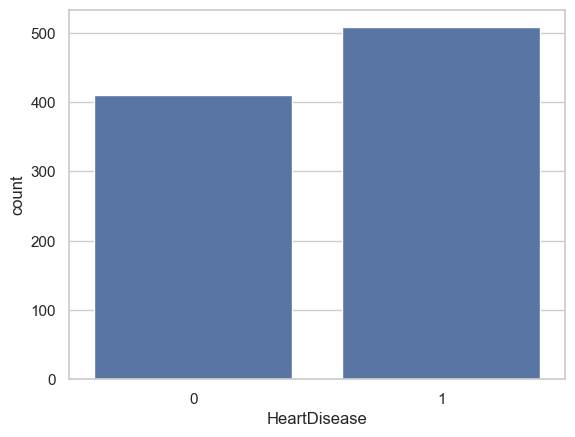

In [6]:
sns.countplot(data=heart_df, x="HeartDisease")

In [7]:
heart_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


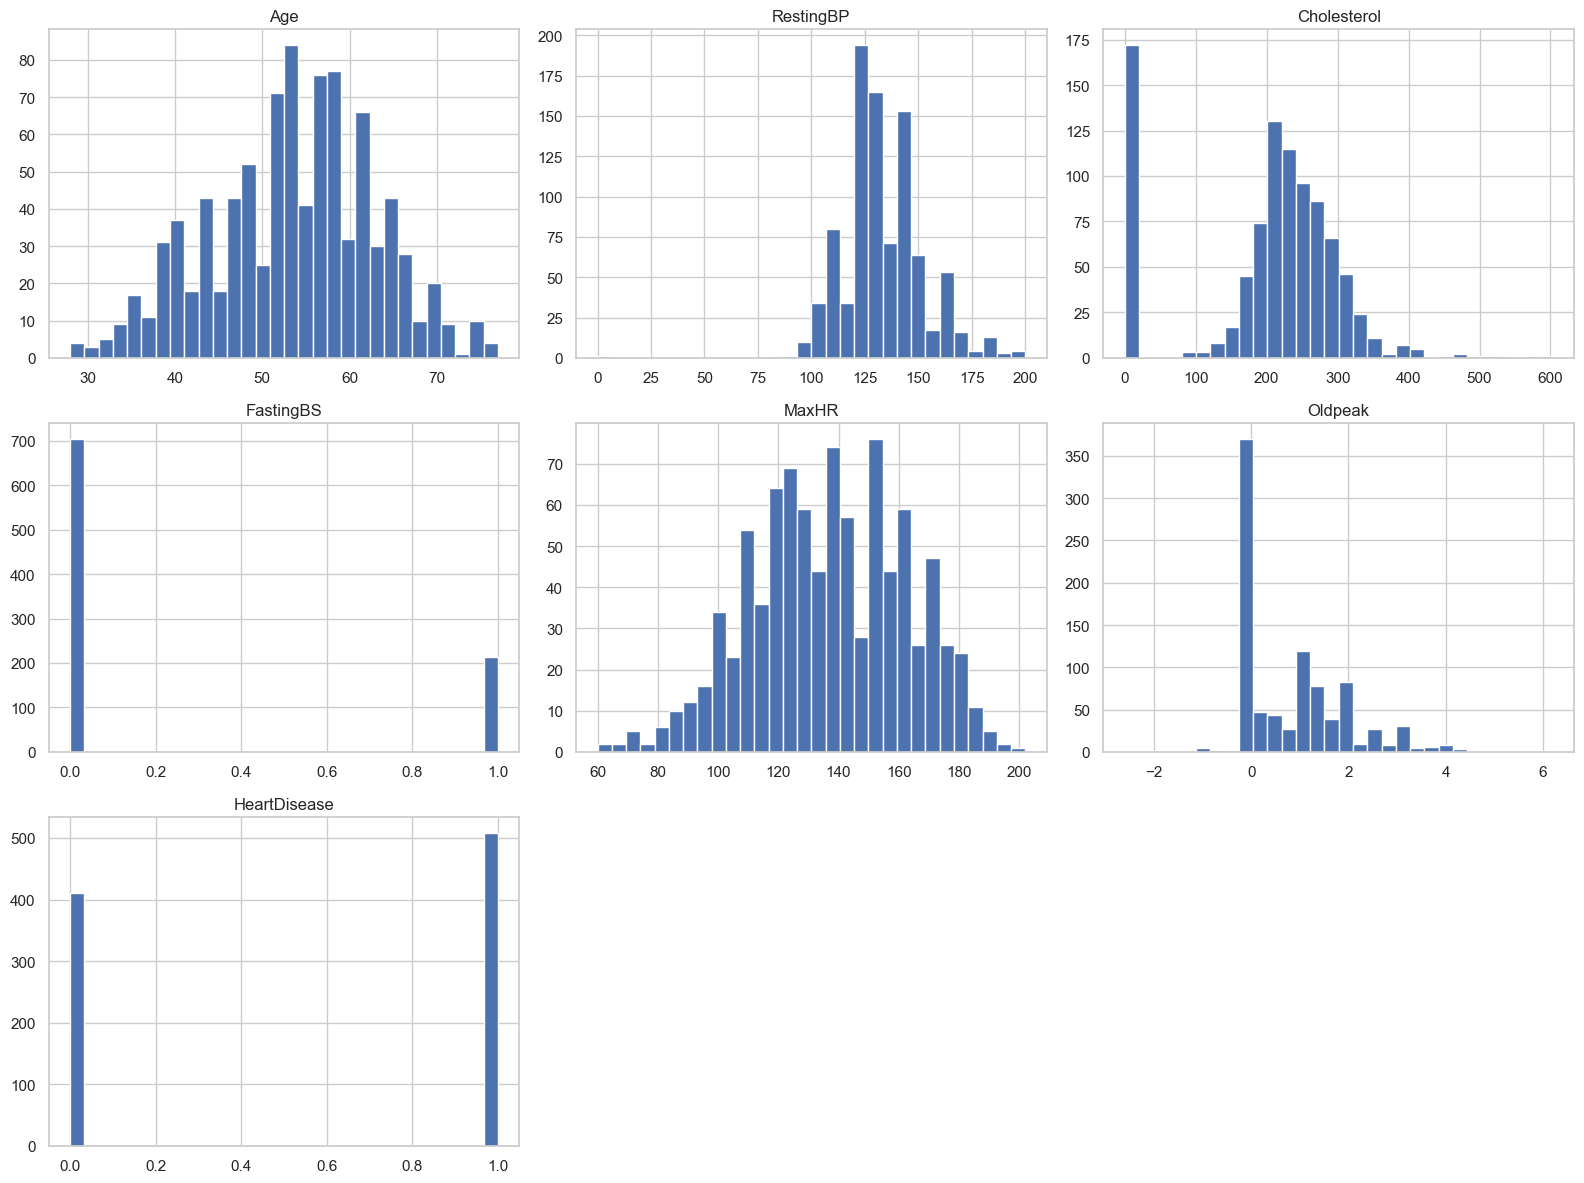

In [8]:
heart_df.hist(bins=30, figsize=(16, 12))
plt.tight_layout()

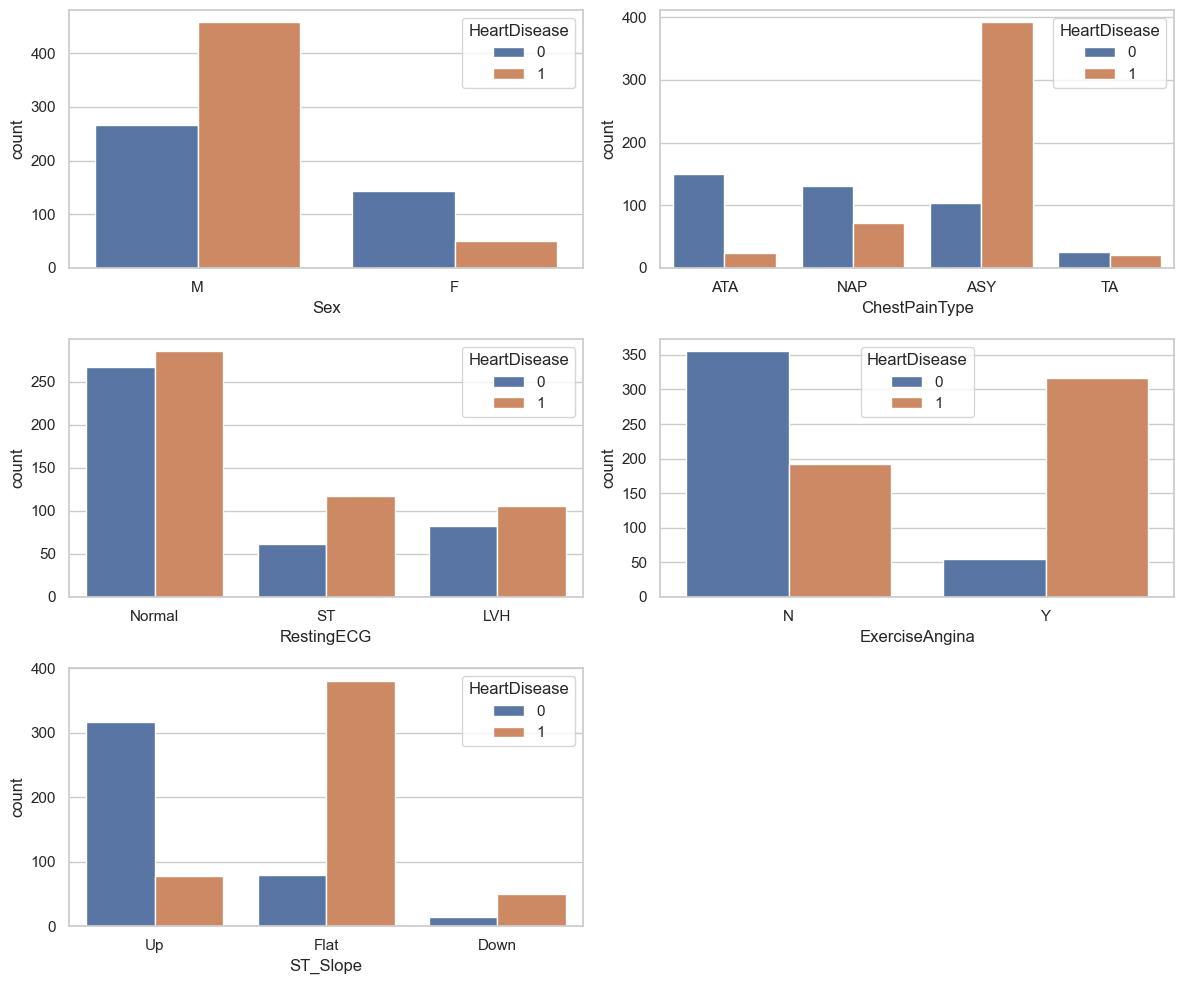

In [9]:
plt.figure(figsize=(12, 10))

for i, col in enumerate(cat_cols):
    plt.subplot(3, 2, i+1)
    sns.countplot(data=heart_df, x=col, hue='HeartDisease')

plt.tight_layout()

<Axes: >

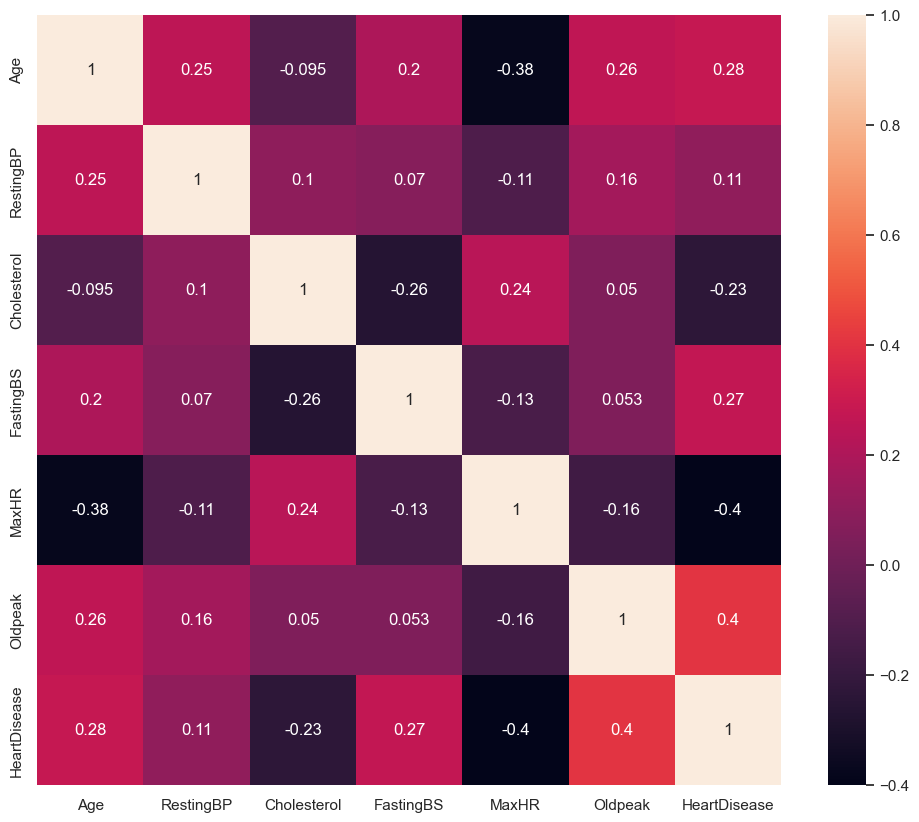

In [10]:
plt.figure(figsize=(12, 10))
sns.heatmap(heart_df.corr(numeric_only=True), annot=True)

In [11]:
heart_df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [12]:
heart_df.groupby(["HeartDisease"]).mean(numeric_only=True)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
HeartDisease,,,,,,
0,50.551220,130.180488,227.121951,0.107317,148.151220,0.408049
1,55.899606,134.185039,175.940945,0.334646,127.655512,1.274213


<Axes: xlabel='Age', ylabel='Count'>

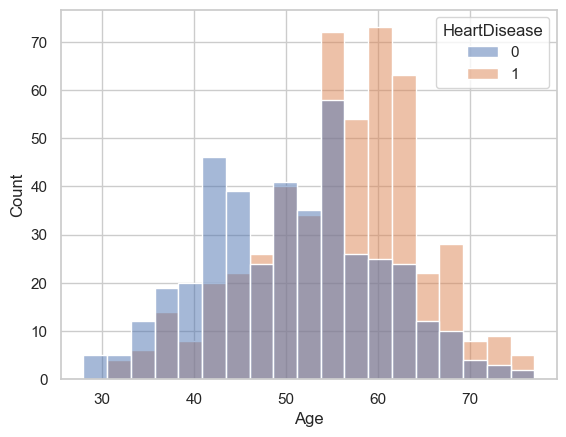

In [13]:
sns.histplot(data=heart_df, x="Age", hue='HeartDisease')

In [14]:
heart_df.groupby(["Sex", "ExerciseAngina"]).mean(numeric_only=True)

Age   RestingBP  Cholesterol  FastingBS       MaxHR  \
Sex ExerciseAngina                                                              
F   N               51.806667  129.360000   237.433333   0.113333  148.753333   
    Y               54.883721  142.162791   254.325581   0.209302  137.023256   
M   N               51.846348  130.287154   188.440806   0.249370  142.992443   
    Y               56.125000  135.057927   186.390244   0.271341  123.835366   

                     Oldpeak  HeartDisease  
Sex ExerciseAngina                          
F   N               0.526667      0.153333  
    Y               1.165116      0.627907  
M   N               0.529219      0.425693  
    Y               1.449390      0.881098

In [15]:
heart_df.pivot_table(values="HeartDisease", index=["RestingECG"], columns=["Sex"], margins=True)

Sex,F,M,All
RestingECG,,,
LVH,0.297872,0.652482,0.563830
Normal,0.245763,0.589862,0.516304
ST,0.250000,0.733333,0.657303
All,0.259067,0.631724,0.553377


In [16]:
heart_df.pivot_table(values="HeartDisease", index=["ExerciseAngina"], columns=["ChestPainType"], margins=True)

ChestPainType,ASY,ATA,NAP,TA,All
ExerciseAngina,,,,,
N,0.623116,0.096154,0.236842,0.425000,0.351005
Y,0.902357,0.529412,0.705882,0.500000,0.851752
All,0.790323,0.138728,0.354680,0.434783,0.553377


In [17]:
heart_df.pivot_table(values="HeartDisease", index=["ST_Slope"], columns=["ExerciseAngina"], margins=True)

ExerciseAngina,N,Y,All
ST_Slope,,,
Down,0.500000,0.926829,0.777778
Flat,0.718085,0.904412,0.828261
Up,0.136499,0.551724,0.197468
All,0.351005,0.851752,0.553377


<Axes: xlabel='ChestPainType'>

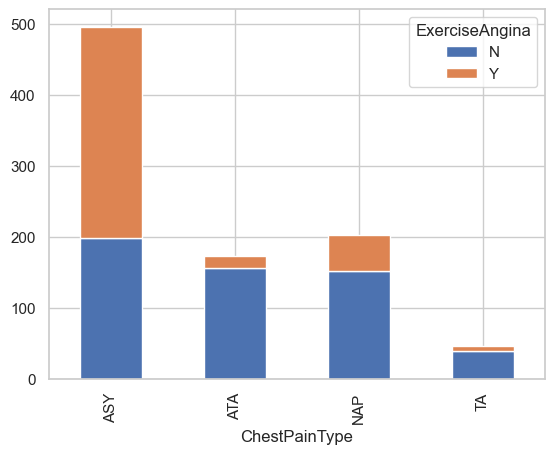

In [18]:
pd.crosstab(index=heart_df["ChestPainType"], columns=heart_df["ExerciseAngina"]).plot(kind="bar", stacked=True)